Scaling exercises


Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [1]:
#imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pull dataset from wragngle fucntion
df = wrangle.wrangle_zillow()
df.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037


In [3]:
#since we do scaling only in train data, split the dataset
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [4]:
#How was split
train.shape,validate.shape,test.shape

((1023397, 7), (438600, 7), (365500, 7))

In [5]:
#define X_train with tax_value only
X_train = train[["tax_value"]]

In [6]:
# using minmaxscaler
scaler1 = MinMaxScaler()
#fit and transform the scaler
X_train_scaled1 = scaler1.fit_transform(X_train)

In [7]:
#print scaled values
X_train_scaled1[:4]

array([[0.11469232],
       [0.03496601],
       [0.02260135],
       [0.10826724]])

Text(0.5, 1.0, 'scaled')

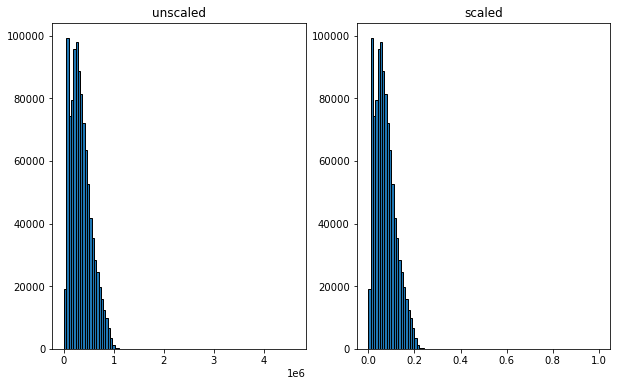

In [8]:
#visualizing unscaled and scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=100, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled1, bins=100, ec ="black")
plt.title('scaled')

the x axis has been scaled

In [9]:
#try standardscaler
scaler2 = StandardScaler()

In [10]:
#fit and transform the scaler
X_train_scaled2 = scaler2.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

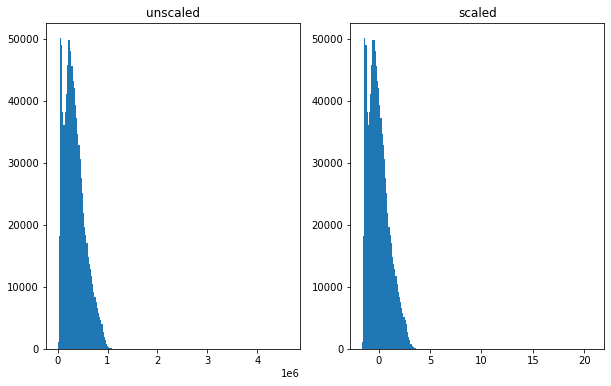

In [11]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=200)
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled2, bins=200)
plt.title('scaled')

In [12]:
#we will mess will robustscaler as well
scaler3 = RobustScaler()

In [13]:
#fit and transforrm
X_train_scaled3 = scaler3.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

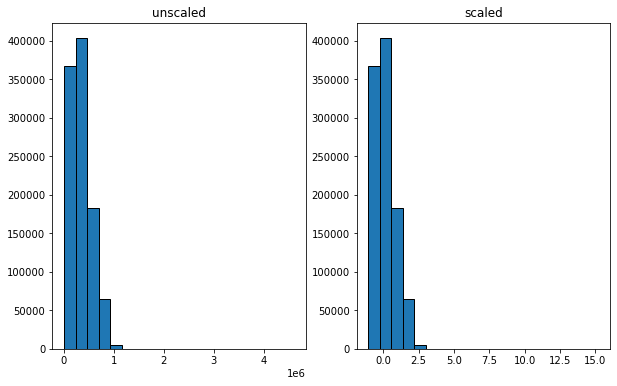

In [14]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled3, bins=20, ec ="black")
plt.title('scaled')

2 Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data

In [15]:
#apply inverse_transform method to scaled x train
inverse_X_train = scaler1.inverse_transform(X_train_scaled1)
inverse_X_train = pd.DataFrame(inverse_X_train)
inverse_X_train.head()

,0
0,529671.0
1,161495.0
2,104395.0
3,500000.0
4,656866.0


In [16]:
X_train[["tax_value"]].head()

,tax_value
1927212,529671
539627,161495
1231220,104395
877619,500000
665807,656866


we get back our original X_train from the transforamtion

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
#define quantine transformer and then fit/transform it
scaler = QuantileTransformer(output_distribution='normal')
X_train_scaled = scaler.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

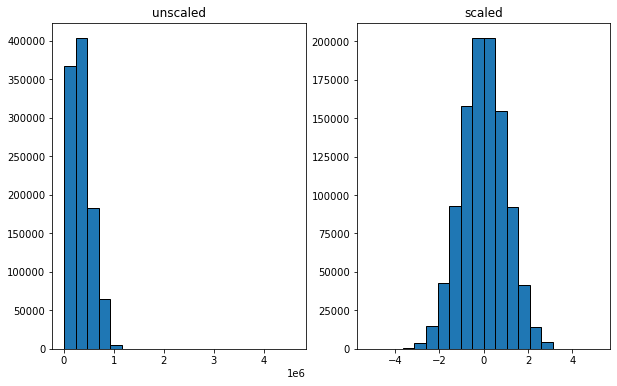

In [18]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled, bins=20, ec ="black")
plt.title('scaled')

a nice normal looking graph, yay!

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [19]:
#define quantine transformer and then fit/transform it
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

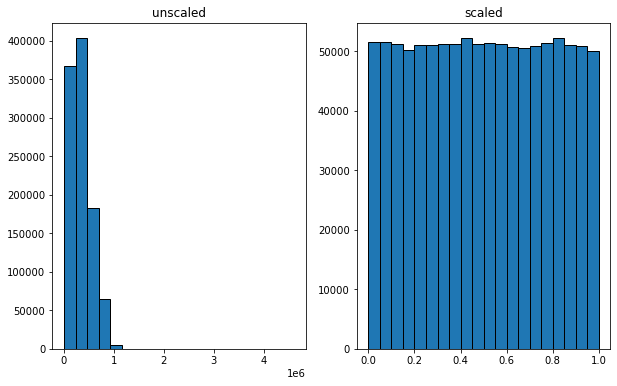

In [20]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled, bins=20, ec ="black")
plt.title('scaled')

scaled graph is by default a uniform distribution

5 Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [47]:
def scale_data(train,validate,test,columns):
    #make the scaler
    scaler = MinMaxScaler()
    #fit the scaler at train data only
    scaler.fit(train[columns])
    #tranforrm train, validate and test
    train_scaled = scaler.transform(train[columns])
    validate_scaled = scaler.transform(validate[columns])
    test_scaled = scaler.transform(test[columns])
    
    # Generate a list of the new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in columns]
    
    #concatenate with orginal train, validate and test
    scaled_train = pd.concat([train.reset_index(drop = True),pd.DataFrame(train_scaled,columns = scaled_columns)],axis = 1)
    scaled_validate = pd.concat([validate.reset_index(drop = True),pd.DataFrame(validate_scaled, columns = scaled_columns)], axis = 1)
    scaled_test= pd.concat([test.reset_index(drop = True),pd.DataFrame(test_scaled,columns = scaled_columns)],axis = 1)
    
    return scaled_train,scaled_validate,scaled_test

In [48]:
scaled_train,scaled_validate,scaled_test =scale_data(train,validate,test,columns =['bedroom', 'bathroom', 'area', 'tax_value', 'tax_amount'])

In [49]:
scaled_train.head(10)

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips,bedroom_scaled,bathroom_scaled,area_scaled,tax_value_scaled,tax_amount_scaled
0,3,2.0,2365,529671,1976,5644.78,6111,0.333333,0.333333,0.693686,0.114692,0.511913
1,4,3.0,2434,161495,1960,2103.93,6037,0.666667,0.666667,0.713950,0.034966,0.189733
2,3,2.0,1751,104395,1920,1405.93,6037,0.333333,0.333333,0.513363,0.022601,0.126222
3,3,2.0,1532,500000,1961,5839.49,6037,0.333333,0.333333,0.449046,0.108267,0.529630
4,3,2.0,1680,656866,1963,7692.52,6059,0.333333,0.333333,0.492511,0.142236,0.698236
5,4,2.5,2160,86991,1972,982.84,6059,0.666667,0.500000,0.633480,0.018833,0.087725
6,4,2.0,1152,42342,1955,1193.34,6111,0.666667,0.333333,0.337445,0.009164,0.106878
7,4,2.0,1752,315049,1963,4244.79,6037,0.666667,0.333333,0.513656,0.068217,0.384529
8,3,1.5,1622,214864,1955,2664.76,6059,0.333333,0.166667,0.475477,0.046523,0.240762
9,3,2.5,1850,308782,1958,3693.36,6059,0.333333,0.500000,0.542438,0.066860,0.334354
